In [ ]:
import pandas as pd

# Nama file dataset
file_name = "New_Gabungan_Semuanya.csv"

# Daftar nilai yang ingin kita anggap sebagai "missing" atau "hilang"
nilai_hilang = ['-', '8888', '9999']

try:
    # Membaca file CSV, menggunakan titik koma sebagai pemisah
    # Memberitahu pandas untuk menganggap nilai di 'nilai_hilang' sebagai NaN (kosong)
    df = pd.read_csv(file_name, delimiter=';', na_values=nilai_hilang)
    print(f"--- Hasil Uji Missing Value pada File: {file_name} ---\n")
    
    # Menghitung jumlah nilai yang hilang (NaN) di setiap kolom
    missing_values = df.isnull().sum()
    
    # Menghitung total semua nilai yang hilang di seluruh dataset
    total_missing = missing_values.sum()
    
    # Menampilkan hasil
    if total_missing > 0:
        # Menghitung total baris untuk kalkulasi persentase
        total_rows = len(df)
        
        # Menghitung persentase missing value
        missing_percentage = (missing_values / total_rows) * 100
        
        # Membuat tabel hasil untuk tampilan yang lebih rapi
        hasil_df = pd.DataFrame({
            'Jumlah Hilang': missing_values,
            'Persentase (%)': missing_percentage
        })
        
        print("Ditemukan nilai yang hilang pada kolom berikut:")
        # Filter dan tampilkan hanya kolom yang memiliki missing value
        print(hasil_df[hasil_df['Jumlah Hilang'] > 0].round(2)) # .round(2) untuk membulatkan persentase
        
        print(f"\nTotal semua data yang hilang: {total_missing}")
    else:
        print("✅ Selamat! Tidak ada data yang hilang di dalam dataset Anda.")

except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan. Pastikan file berada di folder yang sama.")
except Exception as e:
    print(f"Terjadi error: {e}")

--- Hasil Uji Missing Value pada File: New_Gabungan_Semuanya.csv ---

Ditemukan nilai yang hilang pada kolom berikut:
        Jumlah Hilang  Persentase (%)
TN                  3            0.33
TX                  2            0.22
TAVG                3            0.33
RH_AVG              1            0.11
RR                 55            6.03
SS                  5            0.55

Total semua data yang hilang: 69


In [1]:
import pandas as pd
import numpy as np

# Nama file dataset Anda
file_name = "New_Gabungan_Semuanya.csv"

# Daftar nilai yang akan dianggap sebagai data hilang
nilai_hilang = ['-', '8888','9999']

try:
    # 1. Muat dan Bersihkan Data Awal
    df = pd.read_csv(file_name, delimiter=';', na_values=nilai_hilang)
    
    print(f"--- Hasil Uji Outlier pada File: {file_name} ---\n")

    # 2. Tentukan kolom numerik yang akan diuji (kecuali 'TANGGAL')
    kolom_numerik = df.select_dtypes(include=np.number).columns.tolist()

    # Variabel untuk melacak apakah ada outlier yang ditemukan
    outlier_ditemukan = False

    # 3. Lakukan Uji IQR untuk setiap kolom
    for kolom in kolom_numerik:
        # Hitung Q1, Q3, dan IQR
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1

        # Hitung batas bawah dan batas atas
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)

        # Identifikasi outlier
        outliers = df[(df[kolom] < batas_bawah) | (df[kolom] > batas_atas)]

        # 4. Tampilkan Hasil
        if not outliers.empty:
            outlier_ditemukan = True
            print(f"✅ Ditemukan {len(outliers)} outlier pada kolom '{kolom}':")
            # Tampilkan nilai outlier beserta tanggalnya untuk konteks
            print(outliers[['TANGGAL', kolom]])
            print("-" * 30)
    
    if not outlier_ditemukan:
        print("✅ Tidak ditemukan outlier signifikan di dalam dataset.")

except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

--- Hasil Uji Outlier pada File: New_Gabungan_Semuanya.csv ---

✅ Ditemukan 9 outlier pada kolom 'TN':
        TANGGAL    TN
16   17-01-2023  21.0
199  19-07-2023  21.6
211  31-07-2023  21.4
222  11-08-2023  20.8
223  12-08-2023  20.8
224  13-08-2023  20.6
560  14-07-2024  20.2
590  13-08-2024  21.6
625  17-09-2024  21.4
------------------------------
✅ Ditemukan 6 outlier pada kolom 'TX':
        TANGGAL    TX
27   28-01-2023  27.8
278  06-10-2023  38.6
300  28-10-2023  38.8
433  09-03-2024  27.8
759  29-01-2025  27.2
760  30-01-2025  25.0
------------------------------
✅ Ditemukan 4 outlier pada kolom 'TAVG':
        TANGGAL  TAVG
60   02-03-2023  24.9
759  29-01-2025  24.9
760  30-01-2025  23.8
767  06-02-2025  24.5
------------------------------
✅ Ditemukan 130 outlier pada kolom 'RR':
        TANGGAL     RR
0    01-01-2023  137.6
5    06-01-2023   23.5
17   18-01-2023   16.5
18   19-01-2023   23.2
33   03-02-2023   62.2
..          ...    ...
892  11-06-2025   35.4
898  17-06-2025

In [ ]:
import pandas as pd
import numpy as np

# Nama file dataset Anda
file_name = "New_Gabungan_Semuanya.csv"
nilai_hilang = ['-', '8888', '9999']

try:
    # 1. Muat dan Bersihkan Missing Value
    df = pd.read_csv(file_name, delimiter=';', na_values=nilai_hilang)
    df.interpolate(method='linear', inplace=True)
    print("✅ Data berhasil dimuat dan dibersihkan dari missing value.")

    # 2. Terapkan Transformasi Logaritmik pada Kolom Spesifik
    kolom_untuk_transformasi = ['RR']
    print("\n--- Proses Transformasi Logaritmik ---")
    for kolom in kolom_untuk_transformasi:

        # Menggunakan np.log1p(x) yang setara dengan np.log(x + 1)
        # Ini penting untuk menangani nilai 0
        df[f'{kolom}_log'] = np.log1p(df[kolom])
        print(f"INFO: Transformasi log(x+1) diterapkan pada kolom '{kolom}', hasil disimpan di '{kolom}_log'.")

    # 3. Uji Outlier IQR pada Semua Kolom Numerik
    print("\n--- Hasil Uji Outlier (Setelah Transformasi) ---")
    hasil_outlier = []

    # Dapatkan semua kolom numerik, termasuk kolom _log yang baru dibuat
    kolom_numerik = df.select_dtypes(include=np.number).columns.tolist()
    
    for kolom in kolom_numerik:
        # Hitung Q1, Q3, dan IQR
        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1

        # Hitung batas bawah dan batas atas
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)

        # Identifikasi dan hitung outlier
        jumlah_outlier = ((df[kolom] < batas_bawah) | (df[kolom] > batas_atas)).sum()
        persentase_outlier = (jumlah_outlier / len(df)) * 100
        
        # Tambahkan hasil ke list
        hasil_outlier.append({
            "Variabel": kolom,
            "Jumlah Outlier": jumlah_outlier,
            "Persentase Outlier (%)": persentase_outlier
        })

    # 4. Tampilkan Hasil dalam Bentuk Tabel
    hasil_df = pd.DataFrame(hasil_outlier)
    print(hasil_df.to_string(index=False))

except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

✅ Data berhasil dimuat dan dibersihkan dari missing value.

--- Proses Transformasi Logaritmik ---
INFO: Transformasi log(x+1) diterapkan pada kolom 'RR', hasil disimpan di 'RR_log'.

--- Hasil Uji Outlier (Setelah Transformasi) ---
Variabel  Jumlah Outlier  Persentase Outlier (%)
      TN               9                0.986842
      TX               6                0.657895
    TAVG               4                0.438596
  RH_AVG               0                0.000000
      RR             136               14.912281
      SS               0                0.000000
    FF_X               9                0.986842
   DDD_X               0                0.000000
  FF_AVG             348               38.157895
  RR_log               2                0.219298


C:\Users\msi\AppData\Local\Temp\ipykernel_21828\4185237908.py:11: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [11]:
import pandas as pd
import numpy as np

# Fungsi untuk mendeteksi outlier dengan IQR yang dapat disesuaikan
def detect_outliers(df, column, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

# Baca data dari CSV
data = pd.read_csv("New_Gabungan_Semuanya.csv", delimiter=";")

# Ganti nilai khusus dengan NaN
data.replace(["-", "8888", "9999"], np.nan, inplace=True)

# Ubah kolom numerik ke tipe data yang sesuai
numeric_columns = ["TN", "TX", "TAVG", "RH_AVG", "RR", "SS", "FF_X", "DDD_X", "FF_AVG"]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Hapus baris dengan semua nilai NaN
data.dropna(how="all", inplace=True)

# Terapkan log transformasi pada RR
data["RR_transformed"] = np.log1p(data["RR"])  # log(1 + x) untuk menangani nol

# Deteksi outlier dengan faktor IQR = 3 untuk RR telah ditransformasi
for column in ["RR_transformed"]:
    if data[column].notna().sum() > 0:
        outliers = detect_outliers(data, column, iqr_factor=3)
        print(f"Outliers untuk {column}:")
        print(outliers)
        print(f"Jumlah outlier: {len(outliers)}")
        print("---")

# Opsional: Kembali ke nilai asli untuk analisis lebih lanjut
data["RR_outlier_adjusted"] = data["RR"].where(
    ~data.index.isin(outliers.index), data["RR"].quantile(0.95))


Outliers untuk RR_transformed:
Series([], Name: RR_transformed, dtype: float64)
Jumlah outlier: 0
---


✅ Data berhasil dimuat dan dibersihkan.

Matriks Korelasi Pearson:
              TN        TX      TAVG    RH_AVG        RR        SS      FF_X  \
TN      1.000000  0.010884  0.428684  0.076945 -0.165064 -0.027498 -0.058354   
TX      0.010884  1.000000  0.700479 -0.818163 -0.278356  0.574221  0.124270   
TAVG    0.428684  0.700479  1.000000 -0.732727 -0.196783  0.399693  0.037176   
RH_AVG  0.076945 -0.818163 -0.732727  1.000000  0.279665 -0.538071 -0.142273   
RR     -0.165064 -0.278356 -0.196783  0.279665  1.000000 -0.246574 -0.016391   
SS     -0.027498  0.574221  0.399693 -0.538071 -0.246574  1.000000  0.014486   
FF_X   -0.058354  0.124270  0.037176 -0.142273 -0.016391  0.014486  1.000000   
DDD_X   0.050870 -0.294102 -0.171507  0.302492  0.092003 -0.199354 -0.039548   
FF_AVG -0.014760  0.187054  0.130565 -0.245232 -0.038336  0.100905  0.647719   

           DDD_X    FF_AVG  
TN      0.050870 -0.014760  
TX     -0.294102  0.187054  
TAVG   -0.171507  0.130565  
RH_AVG  0.302492

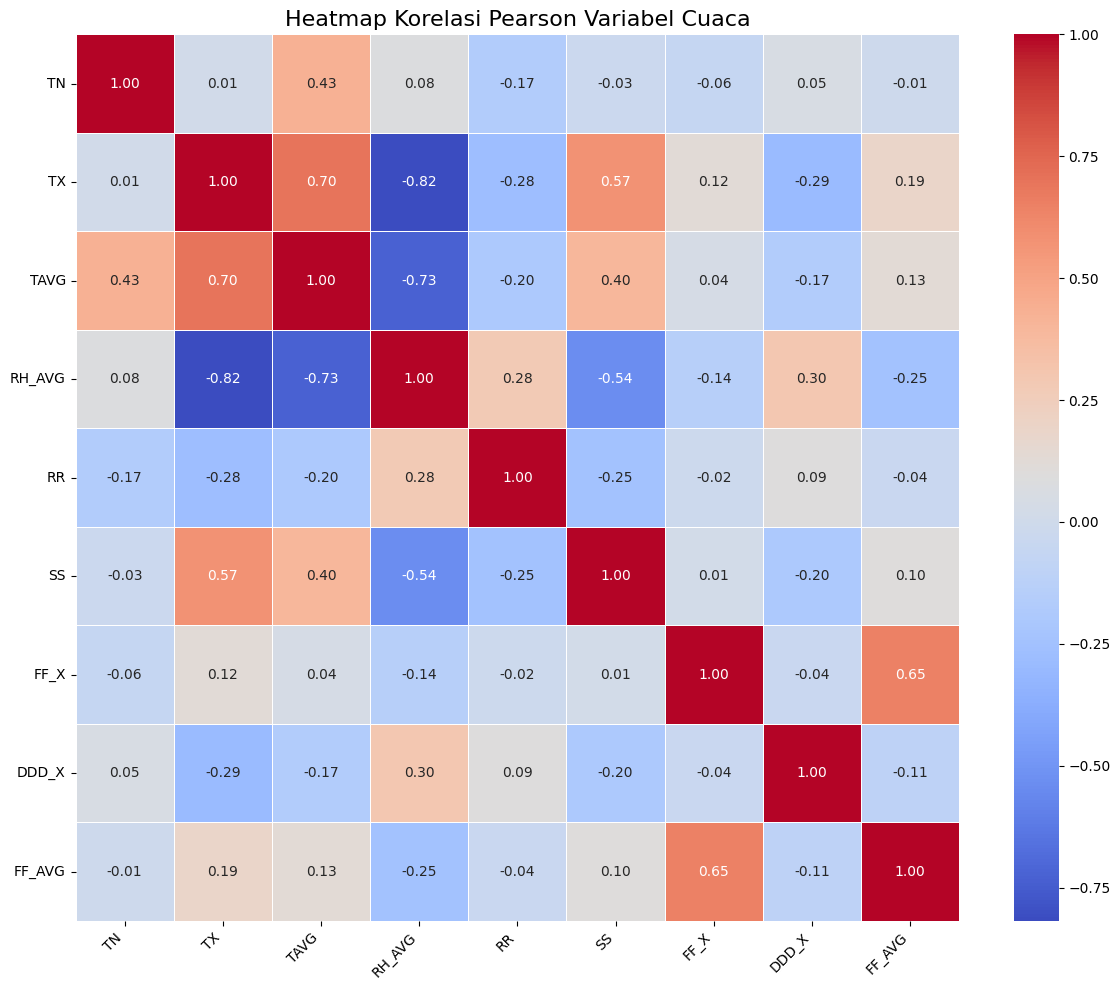

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Nama file dataset Anda
file_name = "New_Gabungan_Semuanya.csv"
nilai_hilang = ['-', '8888','9999']

try:
    # 1. Muat dan Bersihkan Data
    df = pd.read_csv(file_name, delimiter=';', na_values=nilai_hilang)
    # Hapus kolom TANGGAL karena tidak relevan untuk korelasi numerik
    df = df.drop('TANGGAL', axis=1)
    # Isi missing value dengan interpolasi
    df.interpolate(method='linear', inplace=True)
    print("✅ Data berhasil dimuat dan dibersihkan.")

    # 2. Hitung Matriks Korelasi Pearson
    correlation_matrix = df.corr(method='pearson')
    print("\nMatriks Korelasi Pearson:")
    print(correlation_matrix)

    # 3. Buat dan Tampilkan Heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    
    plt.title('Heatmap Korelasi Pearson Variabel Cuaca', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout() # Memastikan label tidak terpotong
    
    # Simpan heatmap sebagai file gambar
    output_filename = 'heatmap_korelasi_pearson.png'
    plt.savefig(output_filename)
    
    print(f"\n✅ Heatmap berhasil dibuat dan disimpan sebagai '{output_filename}'")

except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

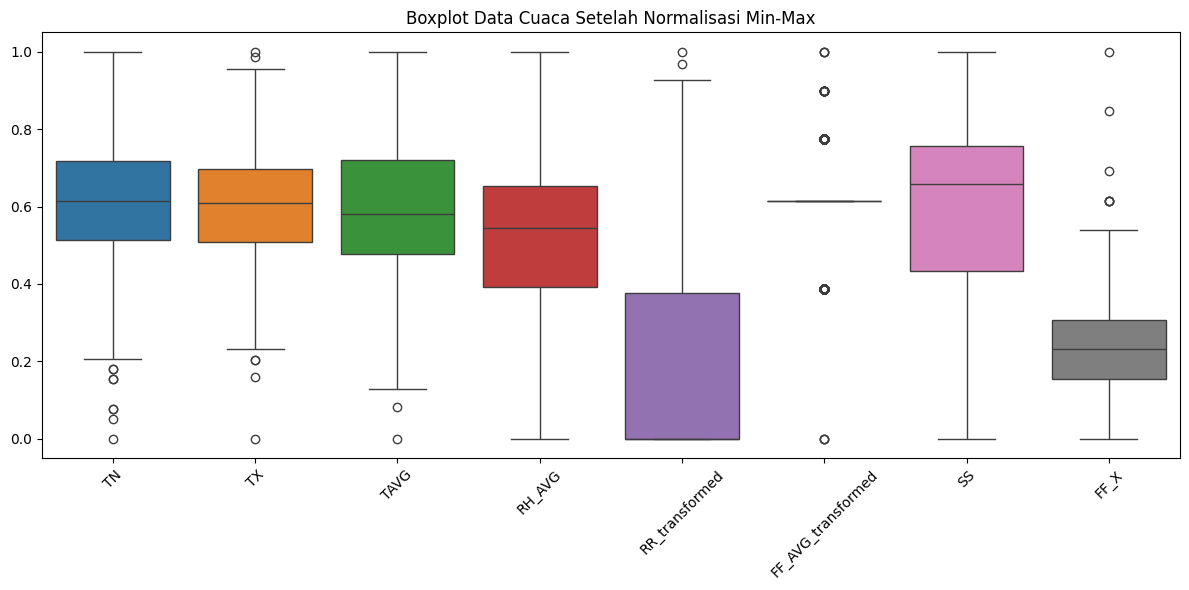

<Figure size 1200x600 with 0 Axes>

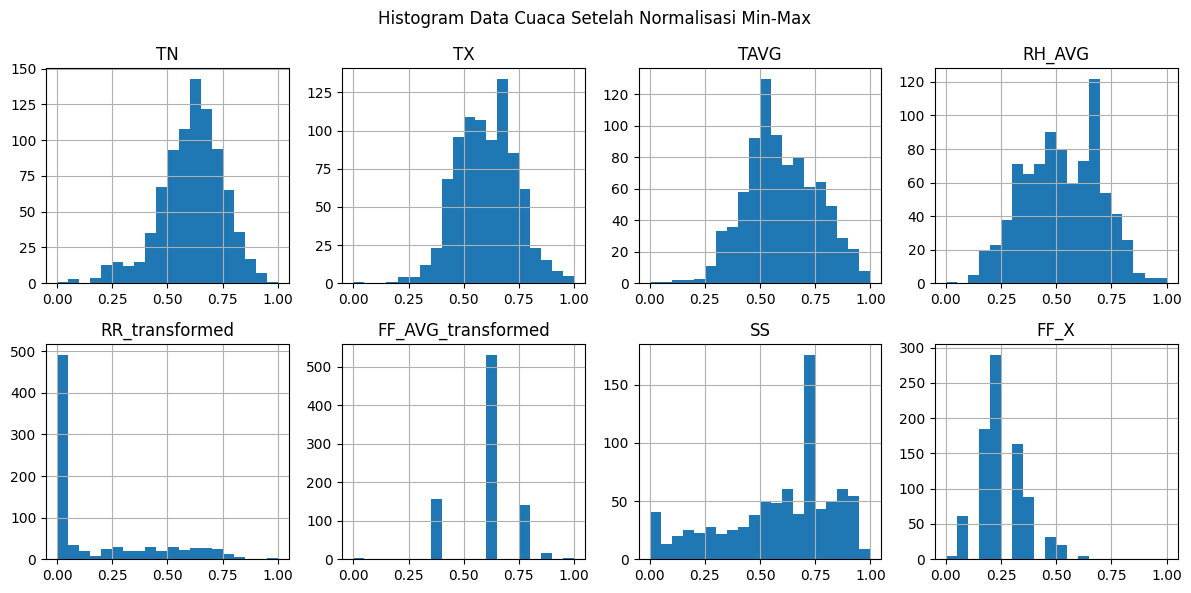

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Baca data dari CSV
data = pd.read_csv("New_Gabungan_Semuanya.csv", delimiter=";")

# Ganti nilai khusus dengan NaN
data.replace(["-", "8888", "9999"], np.nan, inplace=True)

# Ubah kolom numerik ke tipe data yang sesuai
numeric_columns = ["TN", "TX", "TAVG", "RH_AVG", "RR", "SS", "FF_X", "FF_AVG"]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors="coerce")

# Hapus baris dengan semua nilai NaN
data.dropna(how="all", inplace=True)

# Terapkan transformasi log pada RR dan FF_AVG
data["RR_transformed"] = np.log1p(data["RR"])
data["FF_AVG_transformed"] = np.log1p(data["FF_AVG"])

# Pilih kolom untuk normalisasi
columns_to_normalize = ["TN", "TX", "TAVG", "RH_AVG", "RR_transformed", "FF_AVG_transformed", "SS", "FF_X"]
data_to_normalize = data[columns_to_normalize].dropna()

# Inisialisasi dan terapkan MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_to_normalize)

# Ubah kembali ke DataFrame dengan nama kolom asli
data_normalized_df = pd.DataFrame(data_normalized, columns=columns_to_normalize)

# Visualisasi Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_normalized_df)
plt.title("Boxplot Data Cuaca Setelah Normalisasi Min-Max")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisasi Histogram
plt.figure(figsize=(12, 6))
data_normalized_df.hist(bins=20, layout=(2, 4), figsize=(12, 6))
plt.suptitle("Histogram Data Cuaca Setelah Normalisasi Min-Max")
plt.tight_layout()
plt.show()

C:\Users\msi\AppData\Local\Temp\ipykernel_21828\3539808986.py:14: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


✅ Data berhasil dimuat dan dibersihkan.

Fitur (X) yang akan dinormalisasi: ['TN', 'TX', 'RR', 'SS', 'FF_X']
Target (y) yang akan dinormalisasi: ['TAVG', 'RH_AVG', 'FF_AVG', 'DDD_X']

--- Proses Normalisasi Selesai ---

✅ Hasil normalisasi berhasil disimpan ke file: 'gemini_minmax_normalized_data.csv'

--- Membuat Visualisasi Box Plot ---
✅ Box plot berhasil disimpan sebagai 'gemini_boxplot_hasil_normalisasi.png'


<Figure size 1500x800 with 0 Axes>

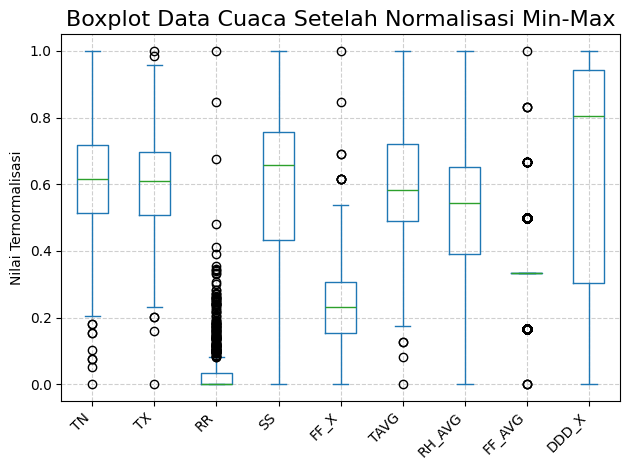

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Nama file dataset Anda
file_name = "New_Gabungan_Semuanya.csv"
nilai_hilang = ['-', '8888', '9999']
output_csv_filename = "gemini_minmax_normalized_data.csv"
output_plot_filename = "gemini_boxplot_hasil_normalisasi.png"

try:
    # 1. Muat dan Bersihkan Data
    df = pd.read_csv(file_name, delimiter=';', na_values=nilai_hilang)
    df.interpolate(method='linear', inplace=True)
    df_cleaned = df.drop('TANGGAL', axis=1)
    print("✅ Data berhasil dimuat dan dibersihkan.")

    # 2. Definisikan Fitur dan Target
    targets = ['TAVG', 'RH_AVG', 'FF_AVG', 'DDD_X']
    features = [col for col in df_cleaned.columns if col not in targets]
    
    X = df_cleaned[features]
    y = df_cleaned[targets]
    
    print("\nFitur (X) yang akan dinormalisasi:", X.columns.tolist())
    print("Target (y) yang akan dinormalisasi:", y.columns.tolist())

    # 3. Inisialisasi Scaler
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()

    # 4. Lakukan Normalisasi
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    
    print("\n--- Proses Normalisasi Selesai ---")

    # 5. Gabungkan Hasil untuk Disimpan dan Divisualisasikan
    df_X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    df_y_scaled = pd.DataFrame(y_scaled, columns=y.columns)
    
    df_normalized = pd.concat([df_X_scaled, df_y_scaled], axis=1)

    # 6. Simpan Hasil ke CSV
    df_normalized.to_csv(output_csv_filename, index=False)
    print(f"\n✅ Hasil normalisasi berhasil disimpan ke file: '{output_csv_filename}'")

    # 7. Buat Visualisasi Box Plot (BAGIAN BARU)
    print("\n--- Membuat Visualisasi Box Plot ---")
    plt.figure(figsize=(15, 8))
    df_normalized.plot(kind='box')
    plt.title('Boxplot Data Cuaca Setelah Normalisasi Min-Max', fontsize=16)
    plt.ylabel('Nilai Ternormalisasi')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()

    # Simpan plot sebagai gambar
    plt.savefig(output_plot_filename)
    print(f"✅ Box plot berhasil disimpan sebagai '{output_plot_filename}'")

except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

C:\Users\msi\AppData\Local\Temp\ipykernel_21828\2960955709.py:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


✅ Data berhasil dimuat dan dibersihkan.
✅ Transformasi logaritmik diterapkan pada RR dan FF_AVG.

Fitur (X) yang akan dinormalisasi: ['TN', 'TX', 'RR', 'SS', 'FF_X']
Target (y) yang akan dinormalisasi: ['TAVG', 'RH_AVG', 'FF_AVG', 'DDD_X']

--- Proses Normalisasi Selesai ---

✅ Hasil transformasi dan normalisasi berhasil disimpan ke file: 'gemini_log_then_minmax_normalized_data.csv'

--- Membuat Visualisasi Box Plot ---
✅ Box plot berhasil disimpan sebagai 'boxplot_log_normalized.png'


<Figure size 1500x800 with 0 Axes>

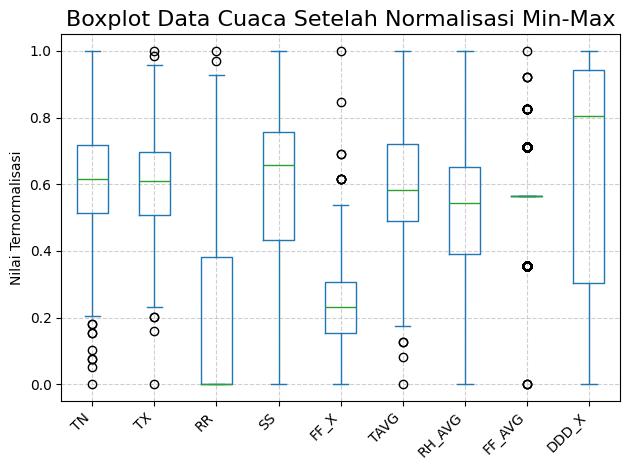

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Nama file dataset Anda
file_name = "New_Gabungan_Semuanya.csv"
nilai_hilang = ['-', '8888', '9999']
output_csv_filename = "gemini_log_then_minmax_normalized_data.csv"
output_plot_filename = "boxplot_log_normalized.png"

try:
    # 1. Muat dan Bersihkan Data
    df = pd.read_csv(file_name, delimiter=';', na_values=nilai_hilang)
    df.interpolate(method='linear', inplace=True)
    df_cleaned = df.drop('TANGGAL', axis=1)
    print("✅ Data berhasil dimuat dan dibersihkan.")

    # 2. Transformasi Logaritmik (log(x+1))
    df_cleaned['RR'] = np.log1p(df_cleaned['RR'])
    df_cleaned['FF_AVG'] = np.log1p(df_cleaned['FF_AVG'])
    print("✅ Transformasi logaritmik diterapkan pada RR dan FF_AVG.")

    # 3. Definisikan Fitur dan Target menggunakan kolom yang sudah ditransformasi
    targets = ['TAVG', 'RH_AVG', 'FF_AVG', 'DDD_X']
    features = ['TN', 'TX', 'RR', 'SS', 'FF_X']
    
    X = df_cleaned[features]
    y = df_cleaned[targets]
    
    print("\nFitur (X) yang akan dinormalisasi:", X.columns.tolist())
    print("Target (y) yang akan dinormalisasi:", y.columns.tolist())

    # 4. Inisialisasi dan Lakukan Normalisasi Min-Max
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y)
    print("\n--- Proses Normalisasi Selesai ---")

    # 5. Gabungkan Hasil untuk Disimpan dan Divisualisasikan
    df_X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
    df_y_scaled = pd.DataFrame(y_scaled, columns=y.columns)
    df_normalized = pd.concat([df_X_scaled, df_y_scaled], axis=1)
    
    # 6. Simpan Hasil ke CSV
    df_normalized.to_csv(output_csv_filename, index=False)
    print(f"\n✅ Hasil transformasi dan normalisasi berhasil disimpan ke file: '{output_csv_filename}'")
    
    # 7. Buat Visualisasi Box Plot (BAGIAN BARU)
    print("\n--- Membuat Visualisasi Box Plot ---")
    plt.figure(figsize=(15, 8))
    df_normalized.plot(kind='box')
    plt.title('Boxplot Data Cuaca Setelah Normalisasi Min-Max', fontsize=16)
    plt.ylabel('Nilai Ternormalisasi')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Simpan plot sebagai gambar
    plt.savefig(output_plot_filename)
    print(f"✅ Box plot berhasil disimpan sebagai '{output_plot_filename}'")

except FileNotFoundError:
    print(f"Error: File '{file_name}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi error: {e}")

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN

# 1. Memuat data
df = pd.read_csv('New_Gabungan_Semuanya.csv', sep=';')

# Membersihkan data: Mengganti nilai non-numerik atau missing
df['FF_AVG'] = pd.to_numeric(df['FF_AVG'], errors='coerce')
df = df.dropna(subset=['FF_AVG'])

# 2. Deteksi outlier dengan IQR
Q1 = df['FF_AVG'].quantile(0.25)
Q3 = df['FF_AVG'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['FF_AVG'] < lower_bound) | (df['FF_AVG'] > upper_bound)]

# 3. Deteksi outlier dengan DBSCAN
X = df[['FF_AVG']].values
dbscan = DBSCAN(eps=0.5, min_samples=5)  # eps disesuaikan untuk skala FF_AVG
df['DBSCAN_Labels'] = dbscan.fit_predict(X)
outliers_dbscan = df[df['DBSCAN_Labels'] == -1]

# 4. Transformasi data dengan RobustScaler
scaler = RobustScaler()
df['FF_AVG_Scaled'] = scaler.fit_transform(df[['FF_AVG']])

# 5. Membuat tabel hasil
results = {
    'Metode': ['IQR', 'DBSCAN', 'RobustScaler'],
    'Jumlah Outlier': [len(outliers_iqr), len(outliers_dbscan), '-'],
    'Persentase Outlier (%)': [
        round(len(outliers_iqr) / len(df) * 100, 2),
        round(len(outliers_dbscan) / len(df) * 100, 2),
        '-'
    ],
    'Min FF_AVG': [df['FF_AVG'].min(), df['FF_AVG'][df['DBSCAN_Labels'] != -1].min(), df['FF_AVG_Scaled'].min()],
    'Max FF_AVG': [df['FF_AVG'].max(), df['FF_AVG'][df['DBSCAN_Labels'] != -1].max(), df['FF_AVG_Scaled'].max()],
    'Mean FF_AVG': [round(df['FF_AVG'].mean(), 2), round(df['FF_AVG'][df['DBSCAN_Labels'] != -1].mean(), 2), round(df['FF_AVG_Scaled'].mean(), 2)],
    'Std FF_AVG': [round(df['FF_AVG'].std(), 2), round(df['FF_AVG'][df['DBSCAN_Labels'] != -1].std(), 2), round(df['FF_AVG_Scaled'].std(), 2)]
}

# Membuat DataFrame untuk tabel
results_df = pd.DataFrame(results)

# Menampilkan tabel
print("\nTabel Hasil Pengujian Outlier pada FF_AVG:")
print(results_df.to_string(index=False))

# Menyimpan data yang telah diproses
df.to_csv('data_with_scaled_FF_AVG.csv', index=False)
print("\nData telah disimpan: 'data_with_scaled_FF_AVG.csv'")


Tabel Hasil Pengujian Outlier pada FF_AVG:
      Metode Jumlah Outlier Persentase Outlier (%)  Min FF_AVG  Max FF_AVG  Mean FF_AVG  Std FF_AVG
         IQR            348                  38.16         0.0         6.0         2.04        0.71
      DBSCAN              7                   0.77         1.0         4.0         2.03        0.67
RobustScaler              -                      -        -2.0         4.0         0.04        0.71

Data telah disimpan: 'data_with_scaled_FF_AVG.csv'


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Tentukan lokasi file data Anda
file_path = 'New_Gabungan_Semuanya.csv'

# 2. Muat dataset
# Menggunakan titik koma (;) sebagai pemisah sesuai format file Anda
try:
    df = pd.read_csv(file_path, delimiter=';')
    print("File berhasil dimuat.")
except FileNotFoundError:
    print(f"Error: File tidak ditemukan di lokasi '{file_path}'")
    exit()

# 3. Pra-pemrosesan kolom 'FF_AVG'
# Mengubah kolom menjadi tipe numerik. Nilai yang tidak valid akan menjadi NaN (Not a Number)
df['FF_AVG_numeric'] = pd.to_numeric(df['FF_AVG'], errors='coerce')

# Memeriksa apakah ada baris yang nilainya kosong/NaN setelah konversi
if df['FF_AVG_numeric'].isnull().any():
    print(f"Ditemukan {df['FF_AVG_numeric'].isnull().sum()} nilai kosong/non-numerik di 'FF_AVG'. Baris ini akan dikecualikan dari analisis.")
    # Buat DataFrame baru tanpa baris yang bermasalah untuk dianalisis
    df_analysis = df.dropna(subset=['FF_AVG_numeric']).copy()
else:
    df_analysis = df.copy()

# Pastikan tipe data adalah float untuk proses scaling
df_analysis['FF_AVG_numeric'] = df_analysis['FF_AVG_numeric'].astype(float)

# 4. Terapkan DBSCAN untuk Deteksi Outlier
# Siapkan data untuk di-scaling (harus dalam format 2D)
data_to_scale = df_analysis[['FF_AVG_numeric']].copy()

# Lakukan standardisasi (scaling) pada data
scaler = StandardScaler()
data_to_scale['FF_AVG_scaled'] = scaler.fit_transform(data_to_scale[['FF_AVG_numeric']])

# Terapkan algoritma DBSCAN
# `eps`: Jarak maksimum antar titik untuk dianggap bertetangga
# `min_samples`: Jumlah minimum titik untuk membentuk sebuah klaster
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_to_scale[['FF_AVG_scaled']])

# 5. Identifikasi dan laporkan hasil outlier
# Tambahkan hasil deteksi (klaster) ke DataFrame analisis
# Outlier ditandai dengan label -1 oleh DBSCAN
df_analysis['is_outlier_dbscan'] = clusters == -1

# Gabungkan hasil kembali ke DataFrame asli
df['is_outlier_dbscan'] = df_analysis['is_outlier_dbscan']

# Ambil baris yang merupakan outlier
outliers = df[df['is_outlier_dbscan'] == True]
outlier_percentage = (len(outliers) / len(df_analysis)) * 100

# 6. Tampilkan ringkasan hasil di console
print("\n" + "="*35)
print("   HASIL DETEKSI OUTLIER (DBSCAN)   ")
print("="*35)
print(f"Total baris data yang dianalisis: {len(df_analysis)}")
print(f"Jumlah outlier yang terdeteksi: {len(outliers)}")
print(f"Persentase outlier: {outlier_percentage:.2f}%")

if not outliers.empty:
    print("\nData yang teridentifikasi sebagai outlier:")
    print(outliers[['TANGGAL', 'FF_AVG']])

# 7. Simpan hasil ke file CSV baru
output_file = 'New_Gabungan_Semuanya_with_outliers.csv'
df.to_csv(output_file, index=False, sep=';')

print(f"\nAnalisis selesai. Hasil lengkap telah disimpan ke file '{output_file}'.")

File berhasil dimuat.

   HASIL DETEKSI OUTLIER (DBSCAN)   
Total baris data yang dianalisis: 912
Jumlah outlier yang terdeteksi: 7
Persentase outlier: 0.77%

Data yang teridentifikasi sebagai outlier:
        TANGGAL  FF_AVG
1    02-01-2023       6
3    04-01-2023       5
102  13-04-2023       0
732  02-01-2025       0
765  04-02-2025       5
766  05-02-2025       5
876  26-05-2025       0

Analisis selesai. Hasil lengkap telah disimpan ke file 'New_Gabungan_Semuanya_with_outliers.csv'.
